In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('housing.csv')

In [3]:
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
RM         489 non-null float64
LSTAT      489 non-null float64
PTRATIO    489 non-null float64
MEDV       489 non-null float64
dtypes: float64(4)
memory usage: 15.4 KB


In [5]:
data.shape

(489, 4)

In [6]:
data.dtypes

RM         float64
LSTAT      float64
PTRATIO    float64
MEDV       float64
dtype: object

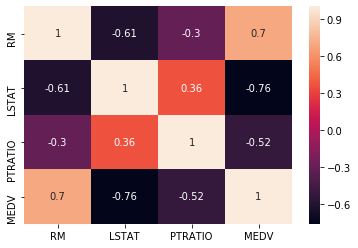

In [7]:
sns.heatmap(data.corr(),annot=True)

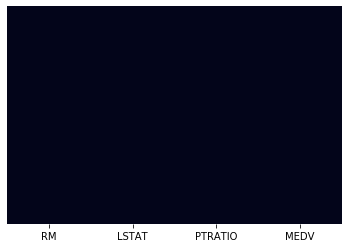

In [8]:
sns.heatmap(data.isnull(),cbar=False,yticklabels=False)

In [9]:
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [10]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

In [11]:
samples = {
    'max_depth':[2,4,6,8,10],
    'min_samples_leaf':[0.01,0.05,0.1,0.2,0.3],
    'min_samples_split':[0.01,0.05,0.1,0.15,0.2]
}

In [12]:
from sklearn.model_selection import GridSearchCV
gd = GridSearchCV(dt,param_grid=samples,n_jobs=-1,cv=10)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
data2 = data.copy()

In [15]:
X = data2.iloc[:,:3].values
y = data2.iloc[:,-1].values

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [17]:
X_train.shape

(391, 3)

In [18]:
gd.fit(X_train,y_train)

C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [0.01, 0.05, 0.1, 0.2, 0.3],
                         'min_samples_split': [0.01, 0.05, 0.1, 0.15, 0.2]},
      

In [19]:
gd.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=0.01,
                      min_samples_split=0.05, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [20]:
gd.best_score_

0.768825874910174

In [21]:
dt2 = gd.best_estimator_

In [22]:
dt2.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=0.01,
                      min_samples_split=0.05, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [23]:
y_pred = dt2.predict(X_test)

In [24]:
y_pred[:5]

array([546988.23529412, 418124.        , 322980.        , 418124.        ,
       459970.        ])

In [25]:
from sklearn.metrics import mean_squared_error,r2_score
r2_score(y_test,y_pred)

0.8186451832454269

In [26]:
mean_squared_error(y_test,y_pred)

5668978664.734654

In [27]:
dt2.feature_importances_

array([0.2186686 , 0.73208034, 0.04925106])

In [28]:
data2.columns[:-1]

Index(['RM', 'LSTAT', 'PTRATIO'], dtype='object')

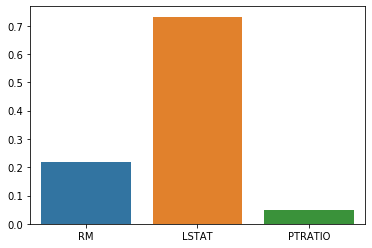

In [29]:
sns.barplot(data2.columns[:-1],dt2.feature_importances_)

In [30]:
import keras

Using TensorFlow backend.


In [31]:
from keras.models import Sequential
from keras.layers import Dense

In [32]:
kmodel = Sequential()

In [33]:
kmodel.add(Dense(6,activation='relu',input_shape=(3,)))

Instructions for updating:
Colocations handled automatically by placer.


In [34]:
kmodel.add(Dense(2,activation='relu'))

In [35]:
kmodel.add(Dense(1))

In [36]:
kmodel.compile(optimizer='adam',loss='mse')

In [37]:
kmodel.fit(X_train,y_train,epochs=20)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
391/391 [==============================] - 3s 9ms/step - loss: 227293108784.4501
Epoch 2/20
391/391 [==============================] - 0s 87us/step - loss: 227292806790.8747
Epoch 3/20
391/391 [==============================] - 0s 107us/step - loss: 227292462391.6522
Epoch 4/20
391/391 [==============================] - 0s 105us/step - loss: 227292074623.0179
Epoch 5/20
391/391 [==============================] - 0s 107us/step - loss: 227291595045.3197
Epoch 6/20
391/391 [==============================] - 0s 115us/step - loss: 227290958457.7800
Epoch 7/20
391/391 [==============================] - 0s 95us/step - loss: 227290177305.5345
Epoch 8/20
391/391 [==============================] - 0s 105us/step - loss: 227289296340.7877
Epoch 9/20
391/391 [==============================] - 0s 97us/step - loss: 227288303893.6062
Epoch 10/20
391/391 [==============================] - 0s 130us/step - loss: 227287197847.8977
Epoch 11/20
391/

In [38]:
kmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 24        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 14        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [39]:
y_pred = kmodel.predict(X_test)

In [40]:
r2_score(y_test,y_pred)

-7.294161603360733

In [41]:
mean_squared_error(y_test,y_pred)

259267583915.04202

In [42]:
y_pred

array([[32.860294],
       [33.83769 ],
       [40.981434],
       [36.911774],
       [32.54682 ],
       [32.471985],
       [36.01926 ],
       [49.577576],
       [42.777317],
       [34.900127],
       [31.665573],
       [28.425907],
       [44.513306],
       [30.86748 ],
       [32.691193],
       [31.734634],
       [34.333275],
       [27.065403],
       [42.75879 ],
       [30.905872],
       [32.69696 ],
       [48.38491 ],
       [33.1229  ],
       [30.211983],
       [43.161354],
       [34.98726 ],
       [31.297735],
       [29.794611],
       [45.287685],
       [28.720165],
       [31.595173],
       [39.478996],
       [37.163574],
       [31.152214],
       [29.290329],
       [31.847532],
       [30.257477],
       [45.94021 ],
       [38.989468],
       [36.792526],
       [30.17332 ],
       [37.907722],
       [37.302776],
       [30.66411 ],
       [28.614998],
       [31.530052],
       [29.007614],
       [43.8777  ],
       [36.41603 ],
       [38.044716],


In [44]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_shape =(3,), activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               512       
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 257       
Total params: 165,377
Trainable params: 165,377
Non-trainable params: 0
_________________________________________________________________


In [45]:
NN_model.fit(X_train,y_train,epochs=30)

Epoch 1/30
391/391 [==============================] - 1s 3ms/step - loss: 448526.9120 - mean_absolute_error: 448526.9120
Epoch 2/30
391/391 [==============================] - 0s 266us/step - loss: 448464.4528 - mean_absolute_error: 448464.4528
Epoch 3/30
391/391 [==============================] - 0s 309us/step - loss: 447894.6775 - mean_absolute_error: 447894.6775
Epoch 4/30
391/391 [==============================] - 0s 279us/step - loss: 444534.9064 - mean_absolute_error: 444534.9064
Epoch 5/30
391/391 [==============================] - 0s 263us/step - loss: 430353.9942 - mean_absolute_error: 430353.9942
Epoch 6/30
391/391 [==============================] - 0s 279us/step - loss: 383268.8192 - mean_absolute_error: 383268.8192
Epoch 7/30
391/391 [==============================] - 0s 294us/step - loss: 270875.9883 - mean_absolute_error: 270875.9883
Epoch 8/30
391/391 [==============================] - 0s 363us/step - loss: 186236.8025 - mean_absolute_error: 186236.8025
Epoch 9/30
391/391

In [46]:
y_pred  = NN_model.predict(X_test)

In [47]:
r2_score(y_test,y_pred)

0.4093433684694322

In [48]:
from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor()

In [49]:
br.fit(X_train,y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [50]:
r2_score(y_test,br.predict(X_test))

0.853539434158875

In [51]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()

In [52]:
ada.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [53]:
r2_score(y_test,ada.predict(X_test))

0.8187502936776856

In [54]:
ada.predict([[6.575,4.98,15.3]])

array([570566.37931034])

In [55]:
br.predict([[6.575,4.98,15.3]])

array([513870.])

In [64]:
dt2.predict([[6.575,4.98,15.3]])

array([570150.])

In [70]:
NN_model.predict([[[6.575,4.98,15.9]]])

array([[510616.44]], dtype=float32)